# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mohamad Adi Taufik Hidayat
- **Email:** aditaufik20@gmail.com
- **ID Dicoding:** Mohamad Adi Taufik Hidayat

## Menentukan Pertanyaan Bisnis

- Pada musim (season) apa jumlah penggunaan sepeda paling banyak, dan pada musim apa penggunaan sepeda paling sedikit?
- Berapa penggunaan sepeda pada hari kerja (workingday) dibandingkan dengan hari libur?
- Bagaimana tren penggunaan sepeda dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

Memuat tabel day.csv

In [2]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/Submission Analisis Data Dicoding/day.csv'

Mounted at /content/drive


In [3]:
day_df = pd.read_csv(path)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
print(day_df.shape)

(731, 16)


**Insight:**
- day.csv berisi jumlah pengguna sepeda yang diagregasi setiap hari.
- Dataset berisi 731 baris dan 16 kolom, setiap baris merepresentasikan 1 hari.
- 16 kolom tersebut sebagai berikut (info dari Readme.txt)
	- instant: indeks record
	- dteday : tanggal
	- season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
	- yr : tahun (0: 2011, 1: 2012)
	- mnth : bulan (1 sampai 12)
	- holiday : hari cuaca hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
	- weekday : hari dalam seminggu
	- workingday : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
	+ weathersit :
		- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
		- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
		- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
		- 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut
	- temp: Suhu yang dinormalisasi dalam Celcius. Nilai dibagi 41 (maks)
	- atemp: Suhu perasaan yang dinormalisasi dalam Celcius. Nilai dibagi 50 (maks)
	- hum: Kelembapan yang dinormalisasi. Nilai dibagi 100 (maks)
	- windspeed: Kecepatan angin yang dinormalisasi. Nilai dibagi 67 (maks)
	- casual: jumlah pengguna biasa
	- registered: jumlah pengguna terdaftar
	- cnt: jumlah total sepeda sewaan termasuk yang kasual dan terdaftar

### Assessing Data

Memeriksa tipe data data dari tiap kolom day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Melihat rangkuman parameter statistik dari data day_df

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melihat nilai max dan min dari kolom weathersit

In [7]:
day_df["weathersit"].max()

3

In [8]:
day_df["weathersit"].min()

1

Memeriksa duplikasi data dan missing value day_df

In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah missing value: ", day_df.isna().sum())

Jumlah duplikasi:  0
Jumlah missing value:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday, harusnya direpresentasikan sebagai tipe data datetime, bukan object.
- Tidak ada weathersit no 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut
- Tidak ada missing value dan duplikasi data

### Cleaning Data

Merubah tipe data kolom dteday dari object menjadi datetime

In [10]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- tipe data pada kolom dteday sudah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

Melihat rangkuman parameter statistik dari data day_df

In [12]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Jumlah pengguna sepeda berdasarkan season/musim

In [13]:
pengguna_per_musim = day_df.groupby(by="season")["cnt"].sum().sort_values(ascending=False)
print ("Jumlah pengguna berdasarkan musim: ")
print(pengguna_per_musim)

Jumlah pengguna berdasarkan musim: 
season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64


In [14]:
pengguna_per_musim = day_df.groupby("season")["cnt"].sum()
terbanyak = pengguna_per_musim.idxmax()
terendah = pengguna_per_musim.idxmin()
print(f"Musim dengan penggunaan sepeda terbanyak: {terbanyak}")
print(f"Musim dengan penggunaan sepeda tersedikit: {terendah}")

Musim dengan penggunaan sepeda terbanyak: 3
Musim dengan penggunaan sepeda tersedikit: 1


Perbandingan jumlah penggunaan sepeda pada workingday dan libur

In [15]:
pengguna_harikerja = day_df.groupby(['yr', 'workingday'])['cnt'].sum()
print(pengguna_harikerja)

yr  workingday
0   0              386839
    1              856264
1   0              613430
    1             1436146
Name: cnt, dtype: int64


Tren penggunaan sepeda dari tahun 2011 ke 2012

In [16]:
pengguna_bulanan = day_df.groupby(['yr','mnth'])["cnt"].mean()
print("Rata-rata penggunaan sepeda tahun 2011:", pengguna_bulanan[0])
print("Rata-rata penggunaan sepeda tahun 2012:", pengguna_bulanan[1])

Rata-rata penggunaan sepeda tahun 2011: mnth
1     1231.903226
2     1721.964286
3     2065.967742
4     3162.333333
5     4381.322581
6     4783.733333
7     4559.387097
8     4409.387097
9     4247.266667
10    3984.225806
11    3405.566667
12    2816.870968
Name: cnt, dtype: float64
Rata-rata penggunaan sepeda tahun 2012: mnth
1     3120.774194
2     3556.448276
3     5318.548387
4     5807.466667
5     6318.225806
6     6761.000000
7     6567.967742
8     6919.451613
9     7285.766667
10    6414.225806
11    5088.800000
12    3990.741935
Name: cnt, dtype: float64


**Insight:**
- Jumlah record 731, setiap record merepresentasikan 1 hari yang diambil dari tanggal 01-01-2011 sampai 31-12-2012.
- Jumlah pengguna terbanyak ada di musim 3 (musim gugur).
- Jumlah pengguna pada saat workingday lebih banyak dibandingkan dengan hari libur.
- Terdapat peningkatan rata-rata pengguna sepeda pada tahun 2012 dibandingkan dengan tahun 2011.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim (season) apa jumlah penggunaan sepeda paling banyak, dan pada musim apa penggunaan sepeda paling sedikit?

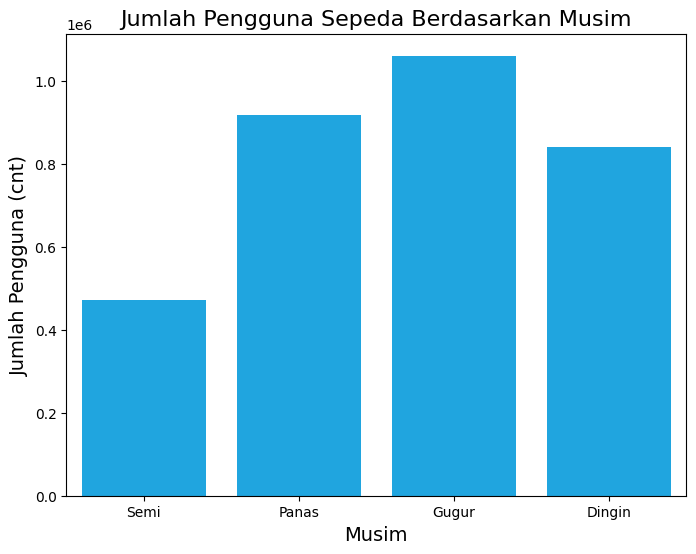

In [17]:
# mapping label musim
label_musim = ["Semi", "Panas", "Gugur", "Dingin"]
day_df['label_musim'] = day_df['season'].map({1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"})

pengguna_per_musim = day_df.groupby('label_musim')['cnt'].sum().reindex(label_musim)
plt.figure(figsize=(8, 6))
sns.barplot(
    x=pengguna_per_musim.index,
    y=pengguna_per_musim.values,
    color='#00b2ff'
)
plt.title("Jumlah Pengguna Sepeda Berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Jumlah Pengguna (cnt)", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

###Pertanyaan 2: Berapa penggunaan sepeda pada hari kerja (workingday) dibandingkan dengan hari libur?



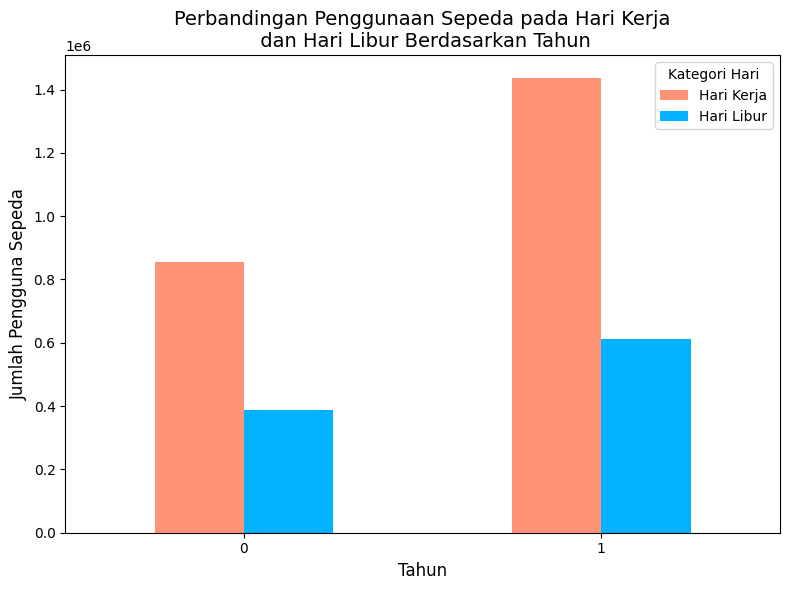

In [18]:
# maping label
day_df['label_workingday'] = day_df['workingday'].map({0: "Hari Libur", 1: "Hari Kerja"})

pengguna_harikerja = day_df.groupby(['yr', 'label_workingday'])['cnt'].sum().unstack()
pengguna_harikerja.plot(
    kind='bar',
    figsize=(8, 6),
    color=['#ff9378', '#00b2ff'],
)
plt.title("Perbandingan Penggunaan Sepeda pada Hari Kerja\n dan Hari Libur Berdasarkan Tahun", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Pengguna Sepeda", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Kategori Hari", fontsize=10)

plt.tight_layout()
plt.show()

###Pertanyaan 3: Bagaimana tren penggunaan sepeda dari tahun 2011 ke 2012?

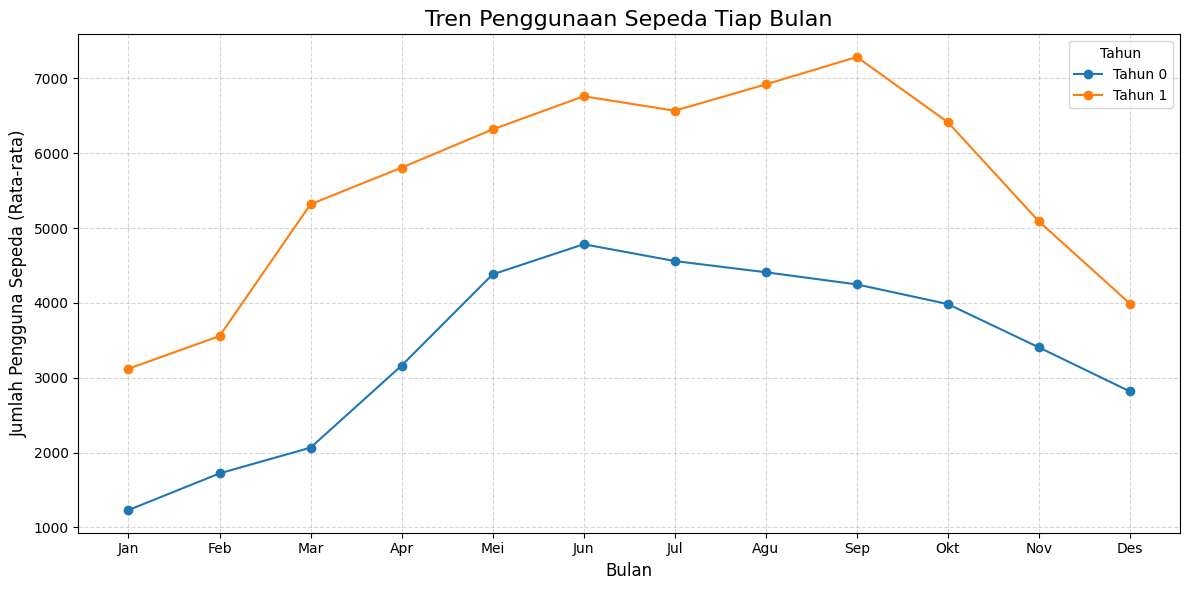

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pengguna_bulanan = day_df.groupby(['yr', 'mnth'])['cnt'].mean().unstack()

plt.figure(figsize=(12, 6))
for year in pengguna_bulanan.index:
    plt.plot(
        pengguna_bulanan.columns,
        pengguna_bulanan.loc[year],
        marker='o',
        label=f"Tahun {year}"
    )
plt.title("Tren Penggunaan Sepeda Tiap Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Pengguna Sepeda (Rata-rata)", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun",
    "Jul", "Agu", "Sep", "Okt", "Nov", "Des"], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Tahun", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Insight:**
- Berdasarkan visualisasi di atas, jumlah pengguna sepeda terbanyak ada di musim musim gugur dan paling sedikit ada di musim semi.
- Penggunaan sepeda lebih banyak di hari kerja dibandingkan di hari libur.
- Tren penggunaan sepeda dari tahun 2011 ke 2012 mengalami peningkatan.

## Analisis Lanjutan (Opsional)

Korelasi antara jumlah pengguna sepeda dengan kondisi cuaca

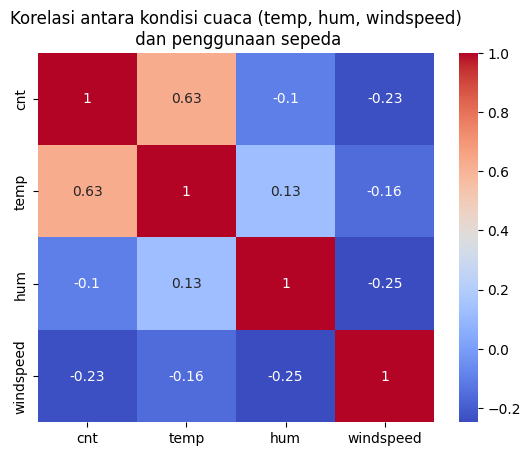

In [20]:
import seaborn as sns

corr = day_df[['cnt', 'temp', 'hum', 'windspeed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelasi antara kondisi cuaca (temp, hum, windspeed)\n dan penggunaan sepeda")
plt.show()

Korelasi antara jumlah pengguna sepeda (cnt) dengan suhu (temp), kelambapan (hum), kecepatan angin (windspeed):
- temp (suhu):
Nilainya 0.63 ==> ketika suhu naik, jumlah pengguna sepeda juga naik. korelasinya cukup kuat.
- hum (kelembapan):
Nilainya -0.10 ==> ketika kelembapan naik, jumlah pengguna sepeda sedikit menurun, korelasinya sangat lemah.
- windspeed (kecepatan angin):
Nilainya -0.23 ==> ketika angin lebih kencang, jumlah pengguna sepeda cenderung menurun, korelasi tidak terlalu kuat.

## Conclusion

deploy streamlit,

- Conclution pertanyaan 1: Berdasarkan visualisasi di atas, jumlah pengguna sepeda terbanyak ada di musim gugur dan paling sedikit ada di musim semi.
- Conclution pertanyaan 2: Penggunaan sepeda lebih banyak di hari kerja dibandingkan di hari libur.
- Conclution pertanyaan 3: Tren penggunaan sepeda dari tahun 2011 ke 2012 mengalami peningkatan.